In [1]:
# ! pip uninstall seaborn==0.12.2

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import time


plt.rcParams['font.family'] = "Malgun Gothic"

In [4]:
print(sns.__version__)

0.13.2


In [5]:
df = pd.read_csv("national_pension_20240521.csv", encoding='cp949')
df.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2024-04,(유)삼송,116810,1,06776,서울특별시 서초구 양재동,서울특별시 서초구 마방로6길,1165010200,1165065200,11,...,1,,NaN,1988-01-01,NaN,NaN,209,73946060,4,3
1,2024-04,(주)장성,214815,1,13511,경기도 성남시 분당구 야탑동,경기도 성남시 분당구 판교로,4113510700,4113561000,41,...,1,172902,그 외 기타 분류 안된 섬유제품 제조업,1988-01-01,NaN,NaN,3,1163240,0,0
2,2024-04,특수법인 총포 화약안전기술협회,118820,1,04162,서울특별시 마포구 용강동,서울특별시 마포구 마포대로1길,1144010500,1144059000,11,...,1,742201,기타 기술 시험 검사 및 분석업,1988-01-01,NaN,NaN,21,7623040,0,0
3,2024-04,서울명지초등학교,111820,1,03656,서울특별시 서대문구 홍은동,서울특별시 서대문구 명지2길,1141011800,1141068000,11,...,1,999999,BIZ_NO미존재사업장,1988-01-01,NaN,NaN,31,6438280,0,0
4,2024-04,삼양건설산업(주),229810,1,06779,서울특별시 서초구 양재동,서울특별시 서초구 동산로,1165010200,1165065200,11,...,1,451101,아파트 건설업,1988-01-01,NaN,NaN,48,18749760,4,5


In [6]:
df.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '재등록일자', '탈퇴일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

In [7]:
df.columns =['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '재등록일자', '탈퇴일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수']
df.drop(['자료생성년월', '우편번호', '사업장지번상세주소', '고객법정동주소코드', '고객행정동주소코드', '사업장형태구분코드 1 법인 2 개인', '적용일자', '재등록일자'], axis=1, inplace=True)
df.head()

,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,사업장도로명상세주소,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장업종코드,사업장업종코드명,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,(유)삼송,116810,1,서울특별시 서초구 마방로6길,11,650,102,,NaN,NaN,209,73946060,4,3
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1163240,0,0
2,특수법인 총포 화약안전기술협회,118820,1,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,NaN,21,7623040,0,0
3,서울명지초등학교,111820,1,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,NaN,31,6438280,0,0
4,삼양건설산업(주),229810,1,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,NaN,48,18749760,4,5


In [8]:
df.columns

Index(['사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '사업장도로명상세주소', '법정동주소광역시도코드',
       '법정동주소광역시시군구코드', '법정동주소광역시시군구읍면동코드', '사업장업종코드', '사업장업종코드명', '탈퇴일자',
       '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

In [9]:
df.columns =['사업장명', '사업자등록번호', '가입상태', '주소', '시도코드',
       '시군구코드', '읍면동코드', '업종코드', '업종코드명', '탈퇴일자',
       '가입자수', '금액', '신규', '상실']


In [10]:
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,(유)삼송,116810,1,서울특별시 서초구 마방로6길,11,650,102,,NaN,NaN,209,73946060,4,3
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1163240,0,0
2,특수법인 총포 화약안전기술협회,118820,1,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,NaN,21,7623040,0,0
3,서울명지초등학교,111820,1,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,NaN,31,6438280,0,0
4,삼양건설산업(주),229810,1,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,NaN,48,18749760,4,5


In [11]:
df['사업장명'].unique()

array(['(유)삼송', '(주)장성', '특수법인 총포 화약안전기술협회', ...,
       '은석건설(주)/일용/자월2리 어류골 해안도로 연장사업 중 철근콘크리트 공사',
       '주식회사원주엔지니어링/일용/클린코리아 WDF 고도화사업',
       '서림종합건설(주)-(일용)제천시생활SOC복합화시설건립사업건축공사중철콘및기타공사'], dtype=object)

In [12]:
df[df['사업장명'].str.contains('\(주\)')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1163240,0,0
4,삼양건설산업(주),229810,1,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,NaN,48,18749760,4,5
5,(주)한국경제신문,110810,1,서울특별시 중구 청파로,11,140,171,221200,잡지 및 정기 간행물 발행업,NaN,493,222494300,36,22
6,(주) 매일경제신문사,203810,1,서울특별시 중구 퇴계로,11,140,137,222102,스크린 인쇄업,NaN,719,254262460,22,14
7,대성출판(주),108811,1,서울특별시 동작구 노량진로,11,590,101,809005,일반 교과학원,NaN,40,9899280,1,3


In [13]:
pattern1 = '(\([^)]+\))'
re.sub(pattern1,'','우성기전(주)')

'우성기전'

In [14]:
df[df['사업장명'].str.contains('\[')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
108718,에스티테크[주],606817,1,부산광역시 사하구 감천항로419번길,26,380,107,291502,기타 물품 취급장비 제조업,NaN,10,3958260,0,0
153197,게스트하우스 [특별자활],206826,1,서울특별시 성동구 가람길,11,200,118,999999,BIZ_NO미존재사업장,NaN,8,1621440,0,0
155448,[주)한빛관리 은행대우 3차1단지/ 생활지원센타],212813,1,경기도 시흥시 은행로,41,390,106,702003,비주거용 부동산 관리업,NaN,3,777860,0,0
160227,비전트레이닝센터[자활사업],206826,1,서울특별시 성동구 자동차시장길,11,200,122,999999,BIZ_NO미존재사업장,NaN,21,1561740,2,4
177151,바이오코리아[BIOKOREA],317826,1,충청북도 청주시 흥덕구 오송읍 오송생명2로,43,113,250,999999,BIZ_NO미존재사업장,NaN,3,651320,0,0


In [15]:
pattern2 = '(\[[^)]+\])'
re.sub(pattern2,'','에스티테크[주]')

'에스티테크'

In [16]:
df[df['사업장명'].str.contains('\/')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
876,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,308,141465300,0,0
1898,재우교통/주,205812,1,서울특별시 마포구 가양대로,11,440,127,602201,택시 운송업,NaN,3,799100,0,0
4725,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,964600,0,0
17415,의료법인해정의료재단/더좋은병원,502821,1,대구광역시 수성구 명덕로,27,260,105,851101,요양병원,NaN,185,43319300,8,4
21519,안산시청(의료급여사례관리/통합돌봄과),134830,1,경기도 안산시 단원구 화랑로,41,273,101,701201,비주거용 건물 임대업(점포 자기땅),NaN,5,1477580,0,0


In [17]:
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3,' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [18]:
def preprocessing(x):
    pattern1 = '(\[[^)]+\])'
    pattern2 = '[^A-Za-z0-9가-힣]'
    x=re.sub(pattern1,'',x)
    x=re.sub(pattern2,'',x)
    x=re.sub(' +',' ',x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)


In [19]:
df['사업장명'].unique()

array(['유삼송', '주장성', '특수법인총포화약안전기술협회', ...,
       '은석건설주일용자월2리어류골해안도로연장사업중철근콘크리트공사', '주식회사원주엔지니어링일용클린코리아WDF고도화사업',
       '서림종합건설주일용제천시생활SOC복합화시설건립사업건축공사중철콘및기타공사'], dtype=object)

In [20]:
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,유삼송,116810,1,서울특별시 서초구 마방로6길,11,650,102,,NaN,NaN,209,73946060,4,3
1,주장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1163240,0,0
2,특수법인총포화약안전기술협회,118820,1,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,NaN,21,7623040,0,0
3,서울명지초등학교,111820,1,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,NaN,31,6438280,0,0
4,삼양건설산업주,229810,1,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,NaN,48,18749760,4,5


In [21]:
df.columns

Index(['사업장명', '사업자등록번호', '가입상태', '주소', '시도코드', '시군구코드', '읍면동코드', '업종코드',
       '업종코드명', '탈퇴일자', '가입자수', '금액', '신규', '상실'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531535 entries, 0 to 531534
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   사업장명     531535 non-null  object
 1   사업자등록번호  531535 non-null  int64 
 2   가입상태     531535 non-null  int64 
 3   주소       531535 non-null  object
 4   시도코드     531535 non-null  int64 
 5   시군구코드    531535 non-null  int64 
 6   읍면동코드    531535 non-null  int64 
 7   업종코드     531535 non-null  object
 8   업종코드명    522773 non-null  object
 9   탈퇴일자     11972 non-null   object
 10  가입자수     531535 non-null  int64 
 11  금액       531535 non-null  int64 
 12  신규       531535 non-null  int64 
 13  상실       531535 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 56.8+ MB


In [23]:
df['탈퇴일자'].sort_values(ascending=True).unique()

array(['2013-05-28', '2013-10-01', '2014-01-01', '2014-04-01',
       '2014-05-26', '2014-06-01', '2014-07-30', '2014-12-25',
       '2015-04-30', '2015-09-02', '2015-10-01', '2015-12-01',
       '2016-04-01', '2016-06-02', '2016-08-01', '2016-08-11',
       '2016-11-22', '2017-03-31', '2017-04-04', '2017-04-07',
       '2017-06-01', '2017-07-11', '2017-08-06', '2017-09-01',
       '2017-09-06', '2017-09-16', '2017-09-22', '2017-10-30',
       '2017-11-19', '2017-11-24', '2017-12-31', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-03-09', '2018-05-26',
       '2018-06-01', '2018-07-01', '2018-08-25', '2018-09-01',
       '2018-09-21', '2018-09-30', '2018-10-11', '2018-11-01',
       '2018-12-01', '2018-12-07', '2018-12-20', '2018-12-21',
       '2018-12-31', '2019-01-01', '2019-01-18', '2019-02-01',
       '2019-02-13', '2019-02-27', '2019-03-01', '2019-03-06',
       '2019-03-10', '2019-03-12', '2019-03-29', '2019-03-31',
       '2019-04-01', '2019-04-02', '2019-04-09', '2019-

In [24]:
df['탈퇴일자_연도']=pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월']=pd.to_datetime(df['탈퇴일자']).dt.month

df['탈퇴일자_연도'].unique()

array([  nan, 2024., 2023., 2020., 2021., 2014., 2022., 2019., 2017.,
       2013., 2018., 2016., 2015.])

In [25]:
df['탈퇴일자_월'].unique()

array([nan,  3.,  8.,  1.,  4.,  9., 12.,  2.,  5.,  6., 10., 11.,  7.])

In [26]:
df['가입상태'].unique()

array([1, 2])

In [27]:
df[(df['가입상태']==2) & (df['탈퇴일자_연도']==2023)]['탈퇴일자_월'].astype(int).value_counts()

탈퇴일자_월
12    1842
11     230
9      133
10     128
7       93
8       72
5       67
1       60
4       35
2       35
6       32
3       31
Name: count, dtype: int64

<Axes: xlabel='탈퇴일자_월'>

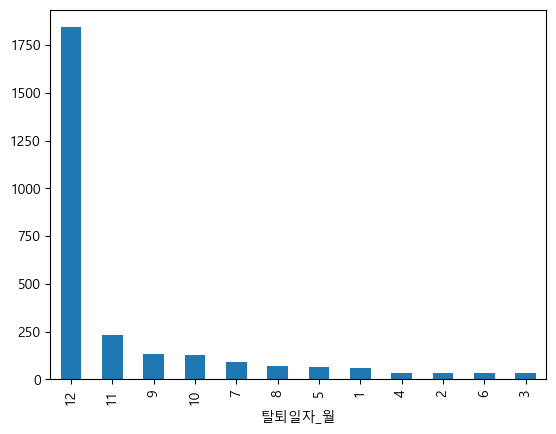

In [28]:
df[(df['가입상태']==2) & (df['탈퇴일자_연도']==2023)]['탈퇴일자_월'].astype(int).value_counts().plot(kind='bar')

In [29]:
df['시도'] = df['주소'].str.split(' ').str[0]
df['시도'].unique()

array(['서울특별시', '경기도', '강원특별자치도', '', '부산광역시', '전라남도', '울산광역시', '인천광역시',
       '전북특별자치도', '충청남도', '충청북도', '경상북도', '세종특별자치시', '대구광역시', '경상남도',
       '제주특별자치도', '대전광역시', '광주광역시', '강원도', '전라북도'], dtype=object)

<Axes: xlabel='시도'>

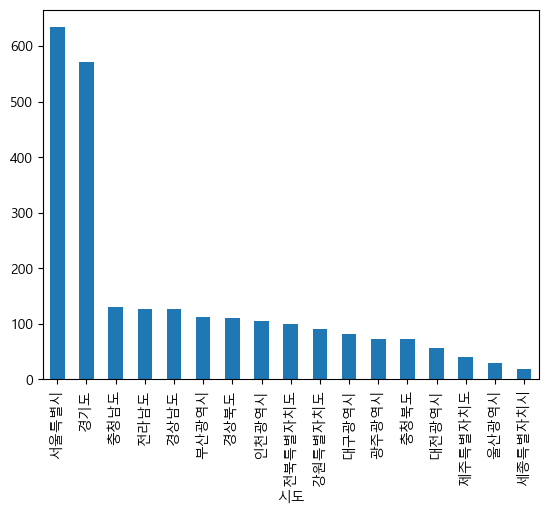

In [30]:
df[(df['가입상태']==2) & (df['탈퇴일자_연도']==2023) & (df['시도'].apply(lambda x:len(x)>0))]['시도'].value_counts().plot(kind='bar')

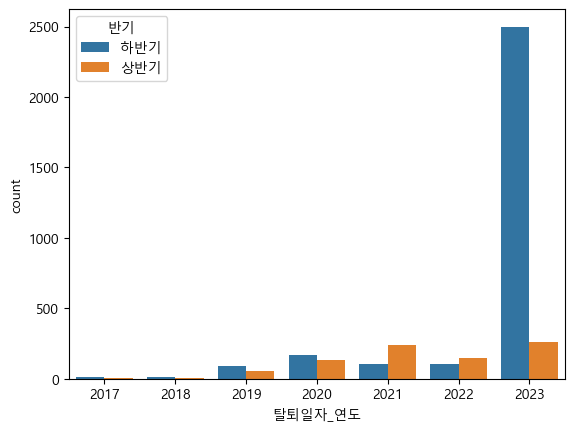

In [31]:
cond1= df[(df['가입상태']==2) & (df['탈퇴일자_연도']>=2017) & (df['탈퇴일자_연도']<=2023)]
temp = cond1.copy()
temp['반기'] = np.where(temp['탈퇴일자_월'] <=6, '상반기','하반기')
temp['탈퇴일자_연도']=temp['탈퇴일자_연도'].astype('int')
sns.countplot(data = temp,x='탈퇴일자_연도',hue='반기')
plt.show()

In [32]:
# 가입상태가 2인 데이터 삭제
# 가입상태, 탈퇴일자 컬럼 제거

df_is = df[df['가입상태']==1].drop(['가입상태','탈퇴일자'],axis=1)
df_is.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실,탈퇴일자_연도,탈퇴일자_월,시도
0,유삼송,116810,서울특별시 서초구 마방로6길,11,650,102,,NaN,209,73946060,4,3,NaN,NaN,서울특별시
1,주장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,3,1163240,0,0,NaN,NaN,경기도
2,특수법인총포화약안전기술협회,118820,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,21,7623040,0,0,NaN,NaN,서울특별시
3,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,31,6438280,0,0,NaN,NaN,서울특별시
4,삼양건설산업주,229810,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,48,18749760,4,5,NaN,NaN,서울특별시


In [33]:
df_is.shape

(519561, 15)

In [34]:
# 핵심 데이터 컬럼 추출
# 수도권(서울, 경기도) 소재의 기업을 대상
# 가입자수를 기준으로 내림차순 정렬, 막대그래프 출력
# 출력되는 사업장명은 상위 20개만 출력

In [35]:
df_is.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519561 entries, 0 to 531534
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   사업장명     519561 non-null  object 
 1   사업자등록번호  519561 non-null  int64  
 2   주소       519561 non-null  object 
 3   시도코드     519561 non-null  int64  
 4   시군구코드    519561 non-null  int64  
 5   읍면동코드    519561 non-null  int64  
 6   업종코드     519561 non-null  object 
 7   업종코드명    510841 non-null  object 
 8   가입자수     519561 non-null  int64  
 9   금액       519561 non-null  int64  
 10  신규       519561 non-null  int64  
 11  상실       519561 non-null  int64  
 12  탈퇴일자_연도  0 non-null       float64
 13  탈퇴일자_월   0 non-null       float64
 14  시도       519561 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 63.4+ MB


In [36]:
df_is['시도'].unique()

array(['서울특별시', '경기도', '강원특별자치도', '', '부산광역시', '전라남도', '울산광역시', '인천광역시',
       '전북특별자치도', '충청남도', '충청북도', '경상북도', '세종특별자치시', '대구광역시', '경상남도',
       '제주특별자치도', '대전광역시', '광주광역시', '강원도', '전라북도'], dtype=object)

In [37]:
df_is[['시도코드','시도']].sort_values(['시도코드'])

,시도코드,시도
40,11,서울특별시
39,11,서울특별시
38,11,서울특별시
34,11,서울특별시
33,11,서울특별시
...,...,...
77,52,전북특별자치도
371816,52,전북특별자치도
371784,52,전북특별자치도
203577,52,전북특별자치도


<Axes: xlabel='가입자수', ylabel='사업장명'>

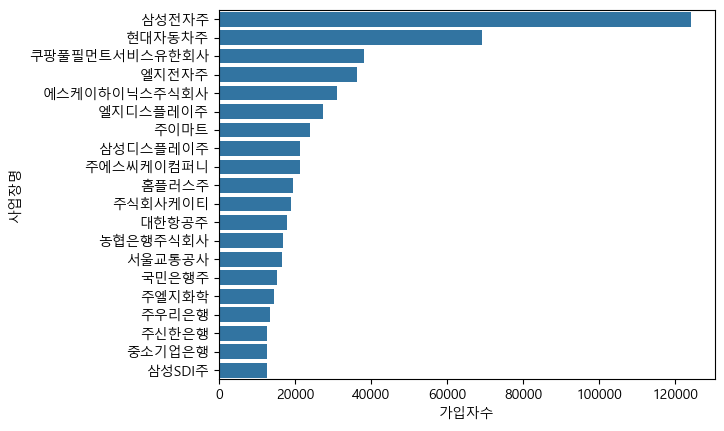

In [38]:
temp1 = df_is.loc[df_is['시도'].isin(['서울특별시','경기도']),['사업장명','가입자수']].sort_values('가입자수',ascending=False).head(20)
# temp1
sns.barplot(y='사업장명',x='가입자수',data=temp1)


## 국민연금 납부액으로 기업별 평균 연봉 추정

In [39]:
#### 인당금액=금액/가입자수
#### 월급여추정=인당금액/9%*100%
#### 연간급여추정 = 월급여추정 * 12개월

In [40]:
df_is['인당금액'] = df_is['금액'] / df_is['가입자수']
df_is['월급여추정'] = df_is['인당금액'] / 9 * 100
df_is['연간급여추정'] = df_is['월급여추정']  * 12

# cond2 = (df_is['가입자수'] > 1000)
# df_is.sort_values(['연간급여추정','가입자수'], ascending=False).loc[cond2,['사업장명','가입자수','월급여추정','연간급여추정']]

In [41]:
cond2 = (df_is['가입자수'] > 1000)
df_is.loc[cond2, ['사업장명', '가입자수', '월급여추정', '연간급여추정']].sort_values(['연간급여추정', '가입자수'], ascending=False)

,사업장명,가입자수,월급여추정,연간급여추정
6225,기아주영업본부,2292,5.899753e+06,7.079704e+07
215137,사부산항만산업협회화물고정업,1080,5.894263e+06,7.073116e+07
3472,삼성에스디에스주,11536,5.851150e+06,7.021380e+07
189761,삼성디스플레이주,21468,5.850185e+06,7.020222e+07
3151,주제일기획,1417,5.846510e+06,7.015812e+07
...,...,...,...,...
5289,단국대학교,1128,1.119553e+06,1.343463e+07
362527,씨제이올리브영주식회사비정규,7680,1.115866e+06,1.339040e+07
40564,한국맥도날드유한회사A,10044,1.107296e+06,1.328755e+07
50824,주식회사케이에프씨코리아,1402,1.080392e+06,1.296471e+07


## 업종별 가입자수 순유입 산정

In [42]:
df_is['순유입'] = df_is['신규'] - df_is['상실']
# df_is
df_is.groupby('업종코드명')['순유입'].sum().sort_values(ascending=False).head(20)

업종코드명
BIZ_NO미존재사업장               16799
배관 및 냉ㆍ난방 공사업              16795
비주거용 건물 임대업(점포  자기땅)       15353
미장  타일 및 방수 공사업             8569
유리 및 창호 공사업                 7933
콘크리트 및 철근 공사업               6777
도배  실내 장식 및 내장 목공사업         5406
요양병원                        4582
기타 토목 시설물 건설업               3995
기타 인문 및 사회과학 연구개발업          3475
일반 전기 공사업                   3045
기타 반도체 소자 제조업               2834
토공사업                        2369
건물용 기계ㆍ장비 설치 공사업            2364
응용 소프트웨어 개발 및 공급업           2096
내부 전기배선 공사업                 1969
아파트 건설업                     1949
그 외 기타 분류 안된 사업 지원 서비스업     1793
수중 공사업                      1186
소방시설 공사업                    1174
Name: 순유입, dtype: int64

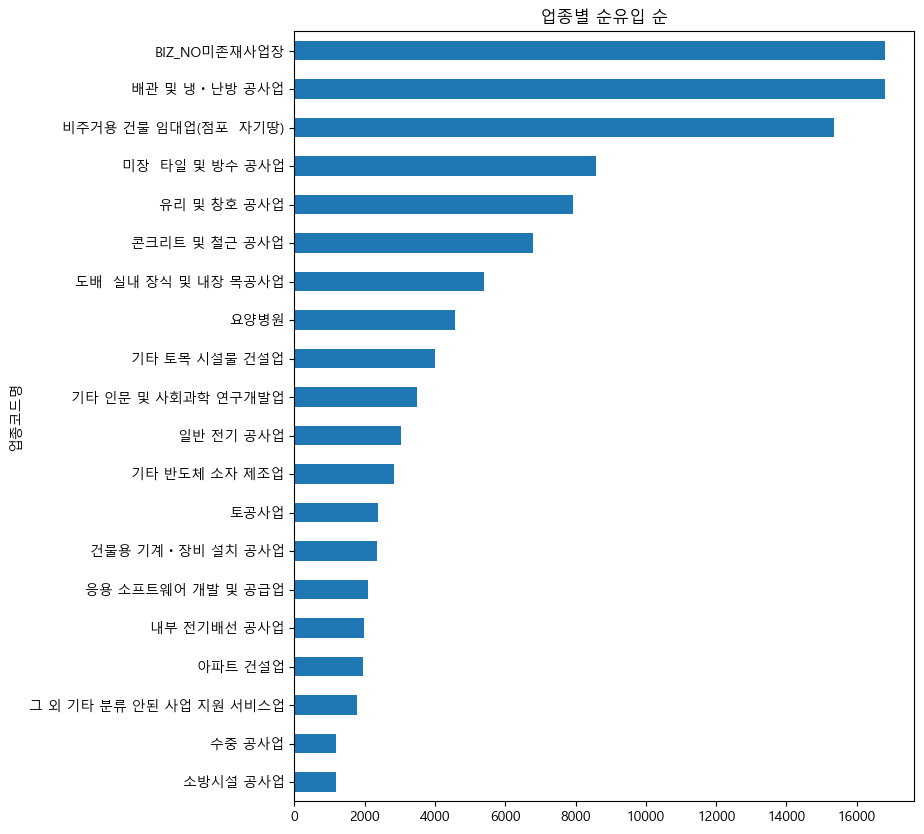

In [43]:
plt.figure(figsize=(8,10))
df_is.groupby('업종코드명')['순유입'].sum().sort_values(ascending=False).head(20).sort_values().plot(kind='barh')
plt.title('업종별 순유입 순')
plt.show()

#### 사업장명 검색

In [44]:
df_is.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실,탈퇴일자_연도,탈퇴일자_월,시도,인당금액,월급여추정,연간급여추정,순유입
0,유삼송,116810,서울특별시 서초구 마방로6길,11,650,102,,NaN,209,73946060,4,3,NaN,NaN,서울특별시,353808.899522,3.931210e+06,4.717452e+07,1
1,주장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,3,1163240,0,0,NaN,NaN,경기도,387746.666667,4.308296e+06,5.169956e+07,0
2,특수법인총포화약안전기술협회,118820,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,21,7623040,0,0,NaN,NaN,서울특별시,363001.904762,4.033354e+06,4.840025e+07,0
3,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,31,6438280,0,0,NaN,NaN,서울특별시,207686.451613,2.307627e+06,2.769153e+07,0
4,삼양건설산업주,229810,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,48,18749760,4,5,NaN,NaN,서울특별시,390620.000000,4.340222e+06,5.208267e+07,-1


In [45]:
def find_company(company_name, contains):
    if contains:
        return df_is.loc[df_is['사업장명'].str.contains(company_name),['사업장명','월급여추정','연간급여추정','업종코드','가입자수']]\
               .sort_values('가입자수',ascending=False)
    else:
        return df_is.loc[df_is['사업장명']==company_name,['사업장명','월급여추정','연간급여추정','업종코드','가입자수']]\
               .sort_values('가입자수',ascending=False) 

In [46]:
find_company('에스케이텔레콤',True)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
3010,에스케이텔레콤주,5.664487e+06,6.797384e+07,642001,5582
363077,에스케이텔레콤씨에스티원주,3.612796e+06,4.335355e+07,924101,74
420160,에스케이텔레콤주상용4단계운항통신시설구매설치사업,3.578209e+06,4.293851e+07,642001,17
456877,에스케이텔레콤주상용경북사업장형태선LTER,5.765778e+06,6.918933e+07,642001,5
129479,주식회사에스케이텔레콤봉화대리점,3.803333e+06,4.564000e+07,523323,3
237748,주에스케이텔레콤철원동송대리점,3.127630e+06,3.753156e+07,515060,3


In [47]:
find_company('에스케이텔레콤',False)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수


In [48]:
# company = find_company('에스케이텔레콤',True)
# rs = company.iloc[0].name
# print(rs)

In [49]:
def company_info(company_name):
    company = find_company(company_name, True)
    return df_is.loc[company.iloc[0].name]

In [50]:
info = company_info('에스케이텔레콤')
info

사업장명              에스케이텔레콤주
사업자등록번호             104813
주소            서울특별시 중구 을지로
시도코드                    11
시군구코드                  140
읍면동코드                  105
업종코드                642001
업종코드명          무선 및 위성 통신업
가입자수                  5582
금액              2845724760
신규                      62
상실                      28
탈퇴일자_연도                NaN
탈퇴일자_월                 NaN
시도                   서울특별시
인당금액         509803.790756
월급여추정       5664486.563956
연간급여추정     67973838.767467
순유입                     34
Name: 3010, dtype: object

In [51]:
type(info)

pandas.core.series.Series

In [52]:
company = find_company('삼성전자', True)
code = company['업종코드'].iloc[0]

In [53]:
df_is.loc[df['업종코드']==code]

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실,탈퇴일자_연도,탈퇴일자_월,시도,인당금액,월급여추정,연간급여추정,순유입
831,교세라커넥터프로덕츠코리아주,119811,경기도 안산시 단원구 범지기로,41,273,105,323001,비디오 및 기타 영상 기기 제조업,107,45829940,0,3,NaN,NaN,경기도,428317.196262,4.759080e+06,5.710896e+07,-3
1095,주지오엠씨,220812,경기도 성남시 수정구 창업로,41,131,115,323001,비디오 및 기타 영상 기기 제조업,5,1537720,0,0,NaN,NaN,경기도,307544.000000,3.417156e+06,4.100587e+07,0
1503,한애전자주,208811,서울특별시 용산구 효창원로66길,11,170,119,323001,비디오 및 기타 영상 기기 제조업,3,1096900,0,0,NaN,NaN,서울특별시,365633.333333,4.062593e+06,4.875111e+07,0
1918,티제이미디어주식회사,130814,서울특별시 마포구 월드컵북로,11,440,127,323001,비디오 및 기타 영상 기기 제조업,223,81493540,4,2,NaN,NaN,서울특별시,365441.883408,4.060465e+06,4.872558e+07,2
2044,주대성하이테크전자,109812,,11,500,104,323001,비디오 및 기타 영상 기기 제조업,3,655280,0,0,NaN,NaN,,218426.666667,2.426963e+06,2.912356e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250708,주식회사두광,379880,경기도 포천시 내촌면 포천로427번길,41,650,320,323001,비디오 및 기타 영상 기기 제조업,4,1090420,0,0,NaN,NaN,경기도,272605.000000,3.028944e+06,3.634733e+07,0
253306,주식회사엠피디테크,814870,경기도 부천시 원미구 조마루로397번길,41,192,101,323001,비디오 및 기타 영상 기기 제조업,16,5120320,0,0,NaN,NaN,경기도,320020.000000,3.555778e+06,4.266933e+07,0
259997,주자이시스,629810,경기도 광명시 하안로,41,210,104,323001,비디오 및 기타 영상 기기 제조업,4,716760,0,0,NaN,NaN,경기도,179190.000000,1.991000e+06,2.389200e+07,0
260326,블루웨이브텔,513852,경상북도 구미시 금오대로20길,47,190,118,323001,비디오 및 기타 영상 기기 제조업,7,1120120,0,0,NaN,NaN,경상북도,160017.142857,1.777968e+06,2.133562e+07,0


In [54]:
df1 =df_is.loc[df_is['업종코드']==code,['월급여추정','연간급여추정']].agg(['mean','count','min','max'])
df1

,월급여추정,연간급여추정
mean,3.332121e+06,3.998545e+07
count,2.680000e+02,2.680000e+02
min,5.092453e+05,6.110943e+06
max,5.850185e+06,7.020222e+07


In [55]:
df1.columns=['업종_월급여추정','업종_연간급여추정']

In [56]:
df1 = df1.T

In [57]:
df1.loc['업종_월급여추정','삼성전자'] = company['월급여추정'].values[0]

In [58]:
df1.loc['업종_연간급여추정','삼성전자'] = company['연간급여추정'].values[0]

In [59]:
df1

,mean,count,min,max,삼성전자
업종_월급여추정,3.332121e+06,268.0,5.092453e+05,5.850185e+06,5.742066e+06
업종_연간급여추정,3.998545e+07,268.0,6.110943e+06,7.020222e+07,6.890480e+07


In [60]:
def compare_company(company_name):
    company = find_company(company_name, True)
    code = company['업종코드'].iloc[0]
    df1 =df_is.loc[df_is['업종코드']==code,['월급여추정','연간급여추정']].agg(['mean','count','min','max'])
    df1.columns=['업종_월급여추정','업종_연간급여추정']
    df1 = df1.T
    df1.columns=['평균','갯수','최소','최대']
    df1.loc['업종_월급여추정',company_name] = company['월급여추정'].values[0]
    df1.loc['업종_연간급여추정',company_name] = company['연간급여추정'].values[0]
    return df1

In [61]:
result = compare_company('삼성전자')
result

,평균,갯수,최소,최대,삼성전자
업종_월급여추정,3.332121e+06,268.0,5.092453e+05,5.850185e+06,5.742066e+06
업종_연간급여추정,3.998545e+07,268.0,6.110943e+06,7.020222e+07,6.890480e+07


In [62]:
company.columns

Index(['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수'], dtype='object')

In [63]:
# company_nameList = ['삼성전자','에스케이텔레콤','현대자동차','버킷플레이스','무신사']

In [64]:
# company_name = input("정확한 회사명을 입력해주세요: ")

In [65]:
# contains = True
# def find_company(company_name):
#     if contains:
#         result1 = df_is.loc[df_is['사업장명'].str.contains(company_name),['사업장명','월급여추정','연간급여추정','업종코드','가입자수']]\
#                .sort_values('가입자수',ascending=False)
#         return result1
    # else:
    #     return df_is.loc[df_is['사업장명']==company_name,['사업장명','월급여추정','연간급여추정','업종코드','가입자수']]\
    #            .sort_values('가입자수',ascending=False)

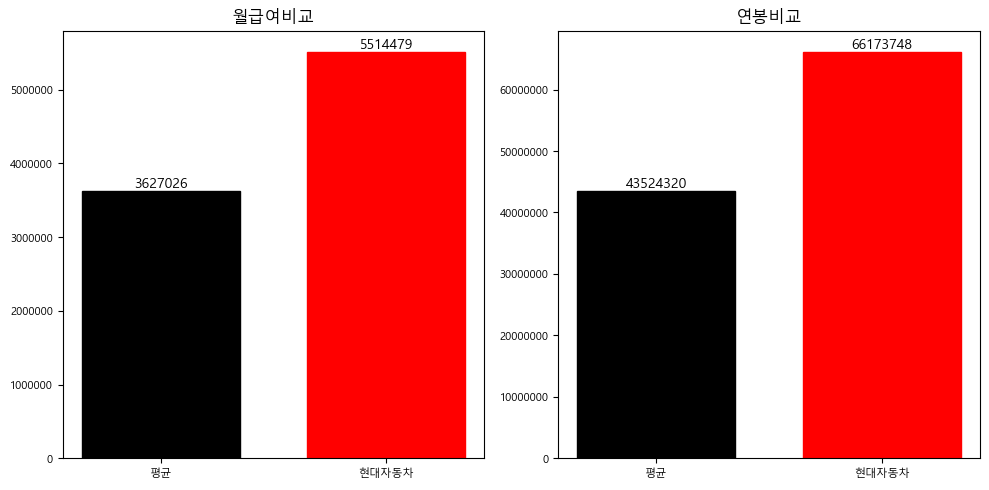

In [67]:
company_name = input("정확한 회사명을 입력해주세요: ")

def find_company(company_name, contains=True):
    if contains:
        return df_is.loc[df_is['사업장명'].str.contains(company_name),['사업장명','월급여추정','연간급여추정','업종코드','가입자수']]\
               .sort_values('가입자수',ascending=False)
    # else:
    #     return df_is.loc[df_is['사업장명']==company_name,['사업장명','월급여추정','연간급여추정','업종코드','가입자수']]\
    #            .sort_values('가입자수',ascending=False)

find_company_info = find_company(company_name)
        
def company_info(company_name):
    company = find_company(company_name, True)
    return df_is.loc[company.iloc[0].name]

info = company_info(company_name)

def compare_company(company_name):
    company = find_company(company_name)
    code = company['업종코드'].iloc[0]
    df1 =df_is.loc[df_is['업종코드']==code,['월급여추정','연간급여추정']].agg(['mean','count','min','max'])
    df1.columns=['업종_월급여추정','업종_연간급여추정']
    df1 = df1.T
    df1.columns=['평균','갯수','최소','최대']
    df1.loc['업종_월급여추정',company_name] = company['월급여추정'].values[0]
    df1.loc['업종_연간급여추정',company_name] = company['연간급여추정'].values[0]
    return df1

result = compare_company(company_name)

# 그래프 그리기

fig, ax = plt.subplots(1, 2, figsize=(10,5))

p1 = ax[0].bar(x=['평균',company_name], height=(result.iloc[0,0], info['월급여추정']), width=0.7)
ax[0].bar_label(p1, fmt='%d')
p1[0].set_color('black')
p1[1].set_color('red')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('월급여비교')

p2 = ax[1].bar(x=['평균',company_name], height=(result.iloc[1,0], info['연간급여추정']), width=0.7)
ax[1].bar_label(p2, fmt='%d')
p2[0].set_color('black')
p2[1].set_color('red')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('연봉비교')

ax[0].tick_params(axis='both', which='major', labelsize=8, rotation=0)
ax[0].tick_params(axis='both', which='minor', labelsize=4)
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].tick_params(axis='both', which='minor', labelsize=4)

plt.tight_layout()